In [ ]:
%config InlineBackend.figure_format = 'png'
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
# plt.rcParams['figure.dpi'] = 150
font_dirs = ["/public/home/mowp/test/fonts/"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
plt.rcParams["font.family"] = "Arial"
sns.despine(top=True, right=True)
from itertools import product
from functools import reduce
import patchworklib as pw
from jpy_tools.otherTools import pwRecoverSeaborn, pwStack, F, pwShow
fc_recoverSns = pwRecoverSeaborn()

<Figure size 432x288 with 0 Axes>

<Figure size 72x72 with 0 Axes>

In [ ]:
import scanpy as sc
import muon as mu
import pandas as pd
import numpy as np
import scipy.sparse as ss
from tqdm import tqdm
from loguru import logger

In [ ]:
import rpy2
import rpy2.robjects as ro
ro.r(".libPaths")("/public1/software/liuzj/softwares/anaconda3/envs/sc_py/lib/R/library")
from rpy2.robjects.packages import importr
import rpy2.ipython.html
rpy2.ipython.html.init_printing()
from jpy_tools.rTools import py2r, r2py, r_inline_plot, rHelp, trl, rSet, rGet, ad2so, so2ad, so2md, rcontext, Trl, r2py_re, py2r_re
from jpy_tools import loadPkl, toPkl
rBase = importr('base')
rUtils = importr('utils')
dplyr = importr('dplyr')
reticulate = importr('reticulate')
R = ro.r
T = Trl()
R("options(browser='firefox', shiny.port=6533)")
%load_ext rpy2.ipython


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

In [ ]:
import seaborn.objects as so
dt_snsStyle = {**sns.axes_style('ticks'), "legend.frameon": False, "axes.spines.top":False, "axes.spines.right":False,}

In [ ]:
from jpy_tools import singleCellTools

Global seed set to 0


In [ ]:
dir_10xh5 = "/public/home/liuzj/projects/singleCell/medicagoTruncatula/01_results/20210816/step1_cellRanger/"
dir_10xh5Medtr5 = "/public/home/liuzj/projects/singleCell/medicagoTruncatula/01_results/20220113/medtr5/results/step1_cellRanger"
dir_result = "/public/home/liuzj/projects/singleCell/medicagoTruncatula/01_results/20210816/step1_cellRanger/result_allData/"
path_gtf = "/public/home/liuzj/data/medtrA17_4/Medicago_truncatula.MedtrA17_4.0.51.chr.gtf"

ls_name = ['control', 'nf_0_5', 'nf_6', 'nf_24']

In [ ]:
dir_temp = '/data/Zhaijx/liuzj/projects/singleCell/02_jupyter/medicagoTruncatula/20220330/'

In [ ]:
# !mkdir {dir_temp}

In [ ]:
# md = loadPkl('md_afterMofa.removeAmb.v2.h5mu', lambda **dt:mu.read_h5mu(**dt), arg_path='filename', dir_path=dir_result)

In [ ]:
df_nameConvert = pd.read_table('/data/Zhaijx/liuzj/data/medtrA17_4/geneInfo/extracted.tsv', sep='\t').set_index('objectB').drop(columns=['mt5'])

In [ ]:
df_nameConvert = df_nameConvert.loc[~df_nameConvert.index.duplicated()]

In [ ]:
# ad = mu.read_h5ad(dir_temp + '/md', 'illuminaAbu')
# ad = sc.read_h5ad(f"{dir_temp}/20220706_all.h5ad")
# ad = loadPkl('ad_20220815', lambda **dt:sc.read_h5ad(**dt), arg_path='filename', dir_path=dir_temp)

In [ ]:
# _dt = {'Mock': '0 hpi'}
# ls_sample = ['0 hpi', '0.5 hpi', '6 hpi', '24 hpi']
# ad.obs = ad.obs.assign(Sample_4 = lambda df:df['Sample'].map(lambda x:_dt.get(x,x))).assign(Sample_4 = lambda df:df['Sample_4'].astype('category').cat.set_categories(ls_sample))

In [ ]:
# ls_sample = ad.obs['Sample'].cat.categories.to_list()

# load known SNF genes

In [ ]:
df_snfGenes = pd.read_excel(
    "/data/Zhaijx/liuzj/projects/singleCell/medicagoTruncatula/04_data/202120429 Reported nodule development related genes(1)(1)(1).xlsx",
)

In [ ]:
df_snfGenes = df_snfGenes.query("`Gene ` != 'SCR'")

In [ ]:
df_snfGenes["parsed_id"] = (
    df_snfGenes.dropna(subset=["Gene ID V4"])["Gene ID V4"]
    .str.replace("Medtr", "MTR_")
)

In [ ]:
ls_snfGenes = df_snfGenes.query("parsed_id in @ad.var.index")['parsed_id'].unique().tolist()

In [ ]:
dt_locus2name = df_snfGenes.dropna(subset=["parsed_id"]).drop_duplicates(["parsed_id"]).set_index(
    "parsed_id"
)["Gene "].to_dict()

In [ ]:
df_acronyms = pd.read_excel('/data/Zhaijx/liuzj/data/medtrA17_4/geneInfo/Mt_gene_Acronyms_IDs_latest.xlsx', skiprows=2)

In [ ]:
dt_locus2name1 = df_acronyms.dropna(subset=["Mt4.0 ID"]).set_index("Mt4.0 ID").rename(lambda x:x.replace('Medtr', 'MTR_'))["ACRONYM"].to_dict()

In [ ]:
dt_locus2name1.update(dt_locus2name)

In [ ]:
dt_locus2name = dt_locus2name1

# load arab data

In [ ]:
ad_arab = sc.read_h5ad("/data/Zhaijx/liuzj/projects/singleCellRoot/bioaxivData/GSE152766_Root_Atlas.h5ad")

In [ ]:
ad_arab.X = ad_arab.layers['raw']

In [ ]:
singleCellTools.basic.initLayer(ad_arab)

In [ ]:
sc.pl.umap(ad_arab, color='AT1G48930', layer='normalize_log', cmap="Reds")

In [ ]:
import gc
gc.collect()

## load ortholog

In [ ]:
path_orthologAraMed = "/public/home/liuzj/projects/singleCell/medicagoTruncatula/00_rawData/annotationData/geneAthJgi.xlsx"

df_orthologAraMed = pd.read_excel(path_orthologAraMed)
df_orthologAraMed['JGI_ID'] = df_orthologAraMed['JGI_ID'].str.split('.').str[0].str.replace("Medtr", "MTR_")
ls_usedMed = df_orthologAraMed.value_counts('JGI_ID').pipe(lambda sr:sr[sr==1]).index
ls_usedAra = df_orthologAraMed.value_counts('Ath_ID').pipe(lambda sr:sr[sr==1]).index
df_orthologAraMed = df_orthologAraMed.query("JGI_ID in @ls_usedMed & Ath_ID in @ls_usedAra")
dt_ara2Med = df_orthologAraMed.set_index('Ath_ID')['JGI_ID'].to_dict()

In [ ]:
dt_med2Ara = {y:x for x,y in dt_ara2Med.items()}

## by marker

In [ ]:
dt_ara2Med

In [ ]:
df_araRootMarker = pd.read_csv('/data/Zhaijx/liuzj/data/Araport11/experimentalRootMarkerFromPcmdb/marker.csv')

In [ ]:
dt_araRootMarker = (
    df_araRootMarker.query("Gene_id in @dt_ara2Med")
    .eval("med_id = Gene_id.map(@dt_ara2Med)", engine="python")
    .query("med_id in @ad.var.index")
    .groupby("Cell_type")["med_id"]
    .agg(list)
    .loc[["pericycle", "phloem", "xylem", "root cortex", "root stele", "root cortex"]]
    .to_dict()
)

## NCBI info

In [ ]:
df_ncbiInfo = pd.read_table("/data/Zhaijx/liuzj/data/medtrA17_4/ncbi/gene_result.txt")

In [ ]:
df_ncbiInfo['locus'] = df_ncbiInfo['Aliases'].str.split(',').str[0]

## load ara data

In [ ]:
ad_ara = sc.read_h5ad('/public/home/liuzj/projects/singleCell/medicagoTruncatula/00_rawData/annotationData/arab/araFromBenfey_subset.h5ad')
ad_ara = ad_ara[:, ad_ara.var.index.isin(list(dt_ara2Med.keys()))]
ad_ara.var.index = ad_ara.var.index.map(dt_ara2Med)
ad_ara.obs['med_leiden'] = None

In [ ]:
ad_med = sc.AnnData(ad.layers['raw'], obs=ad.obs[['leiden', 'batch_time']], var=ad.var[[]])
ad_med.obs = ad_med.obs.rename(columns={'leiden':'med_leiden'}).assign(specie='med', batch=ad_med.obs['batch_time'])
ad_med.obs['celltype.anno'] = 'Unknown'

## get label transfer result

In [ ]:
toPkl(ad_ara, 'ad_ara', 'scem')
toPkl(ad_med, 'ad_med', 'scem')

In [ ]:
# run on scem
ad_integrated = jpy_tools.singleCellTools.useScvi.labelTransferByScanvi(
    ad_ara,
    refLabel="celltype.anno",
    refLayer="X",
    queryAd=ad_med,
    queryLayer="X",
    needLoc=True,
    ls_removeCateKey=["batch", "specie"],
    max_epochs=400,
    mode="merge",
    threads=32
)

In [ ]:
ad_ara = loadPkl('ad_ara').copy()
ad_med = loadPkl('ad_med').copy()
ad_integrated = loadPkl('ad_integrated').copy()

In [ ]:
ad.obs['labelTransfer_scanvi_celltype.anno'] = ad_med.obs['labelTransfer_scanvi_celltype.anno']

In [ ]:
ad.obs["labelTransfer_scanvi_celltype.anno"] = ad.obs["labelTransfer_scanvi_celltype.anno"].map(lambda x:{'unknown':"Unknown"}.get(x,x))

In [ ]:
sc.pl.umap(ad, color="labelTransfer_scanvi_celltype.anno", title="Annotation result")
sc.pl.umap(ad, color="leiden", legend_loc="on data")

singleCellTools.plotting.plotLabelPercentageInCluster(
    ad,
    "leiden",
    "labelTransfer_scanvi_celltype.anno",
    dt_kwargsForLegend=dict(loc="upper left", bbox_to_anchor=(0, -0.3), ncol=5),
)
plt.xlabel("Cluster (Un-merged)")

# GO

In [ ]:
import jpy_tools.otherTools
import importlib
importlib.reload(jpy_tools.otherTools)

<module 'jpy_tools.otherTools' from '/public1/software/liuzj/scripts/jModule/jpy_tools/otherTools.py'>

In [ ]:
from jpy_tools.otherTools import getGoDesc

In [ ]:
df_go = pd.read_table("/data/Zhaijx/liuzj/data/medtrA17_4/goFile/inraeGO.tsv")
df_goDesc = getGoDesc(df_go["goTerm"].unique().tolist(), retry=5)
df_termGene = df_go[["goTerm", "gene"]].rename(
    columns={"gene": "Gene stable ID", "goTerm": "GO term accession"}
)
df_termName = df_goDesc.reset_index()[["index", "hitName"]].rename(
    columns={"index": "GO term accession", "hitName": "GO term name"}
)
dt_goToCat = df_go.set_index("goTerm")["cate"].to_dict()

100%|██████████| 5889/5889 [01:20<00:00, 72.85it/s]
2022-08-31 16:07:04.096 | WARNING  | jpy_tools.otherTools:getGoDesc:605 - query : GO:0016021, target : GO:0016020
2022-08-31 16:07:04.100 | WARNING  | jpy_tools.otherTools:getGoDesc:605 - query : GO:0070919, target : GO:0030422
2022-08-31 16:07:04.104 | WARNING  | jpy_tools.otherTools:getGoDesc:605 - query : GO:0005887, target : GO:0005886
2022-08-31 16:07:04.108 | WARNING  | jpy_tools.otherTools:getGoDesc:605 - query : GO:0106311, target : GO:0004674
2022-08-31 16:07:04.111 | WARNING  | jpy_tools.otherTools:getGoDesc:605 - query : GO:1990939, target : GO:0003777
2022-08-31 16:07:04.115 | WARNING  | jpy_tools.otherTools:getGoDesc:605 - query : GO:0006342, target : GO:0031507
2022-08-31 16:07:04.126 | WARNING  | jpy_tools.otherTools:getGoDesc:605 - query : GO:0071049, target : GO:0071028
2022-08-31 16:07:04.128 | WARNING  | jpy_tools.otherTools:getGoDesc:605 - query : GO:0004647, target : GO:0036424
2022-08-31 16:07:04.129 | WARNING  |

In [ ]:
cpro = importr('clusterProfiler')
rBase = importr("base")
R = ro.r

dfR_termGene = py2r(df_termGene)
dfR_termName = py2r(df_termName)

def enrichmentAnalysisGO(ls_gene, ls_background, qvalueCutoff=0.2, pvalueCutoff=0.05, dt_goToCat=dt_goToCat):
    _go = cpro.enricher(
        R.c(*ls_gene),
        universe=R.c(*ls_background),
        TERM2GENE=dfR_termGene,
        TERM2NAME=dfR_termName,
        qvalueCutoff=qvalueCutoff,
        pvalueCutoff=pvalueCutoff
    )
    df_go = r2py(rBase.as_data_frame(_go))
    if df_go.empty:
        return df_go
    df_go["-log10Pvalue"] = np.log10(df_go["pvalue"]) * -1
    if dt_goToCat:
        df_go["Category"] = df_go.index.map(dt_goToCat)
        df_go = df_go.sort_values(["Category", "pvalue"])
    else:
        df_go = df_go.sort_values(["pvalue"])
    return df_go

# QC

In [ ]:
df_gtf = pr.read_gtf(path_gtf, as_df=True)
ls_useGene = df_gtf.query("gene_biotype == 'protein_coding' & Feature == 'gene'")[
    "gene_id"
].to_list()

In [ ]:
def readData(path_10xh5, ls_useGene):
    ad = sc.read_10x_h5(path_10xh5)
    ad.var = ad.var.rename_axis(index='gene_name').reset_index().set_index('gene_ids')
    ad = ad[:, ad.var.index.isin(ls_useGene)]
    return ad

In [ ]:
ad = [readData(x, ls_useGene) for x in lsPath_10xh5]
ad = sc.concat(ad, label='batch_time', keys=ls_name, index_unique='_batch_')
ad.layers['raw'] = ad.X.copy()

In [ ]:
jpy_tools.singleCellTools.detectDoublet.byScDblFinder(ad, batch_key='batch_time')

In [ ]:
jpy_tools.singleCellTools.plotting.plotCellScatter(ad, batch='batch_time')

In [ ]:
ad = ad[ad.obs.eval(" 300<=n_genes<=3000 & 500<=n_counts<=5000")]

In [ ]:
ad.obs.value_counts("batch_time")

# clustering

In [ ]:
import scvi
from jpy_tools.otherTools import loadPkl, toPkl

In [ ]:
sc.pp.highly_variable_genes(ad, layer='raw', batch_key='batch_time', n_top_genes=5000, flavor='seurat_v3')

In [ ]:
ad.layers['normalize_log'] = ad.layers['raw'].copy()
sc.pp.normalize_total(ad, 1e4, layer='normalize_log')
sc.pp.log1p(ad, layer='normalize_log')

In [ ]:
ad_forScvi = jpy_tools.singleCellTools.basic.getPartialLayersAdata(ad, 'raw', ['batch_time'], ['highly_variable'])
ad_forScvi = ad_forScvi[:, ad_forScvi.var['highly_variable']].copy()

In [ ]:
# run on scem server; gpu needed
toPkl(ad_forScvi, 'ad_forScvi', 'scem')
scvi.data.setup_anndata(
    ad_forScvi,
    batch_key='batch_time'
)

scvi.settings.seed = 39
scvi.settings.num_threads = 56

model = scvi.model.SCVI(ad_forScvi)
model.train()
toPkl(model, 'model', 'ipf', lambda x,**dt:x.save(**dt), 'dir_path', overwrite=True)

In [ ]:
model = loadPkl('model', lambda **dt:scvi.model.SCVI.load(**dt), arg_path='dir_path', adata=ad_forScvi)
ad_forScvi.obsm['X_scvi'] = model.get_latent_representation(ad_forScvi).copy()
ad.obsm['X_scvi'] = ad_forScvi.obsm['X_scvi'].copy()

In [ ]:
sc.pp.neighbors(ad, use_rep='X_scvi')
sc.tl.umap(ad)

In [ ]:
sc.tl.leiden(ad, 0.4, key_added="leiden.0.4")

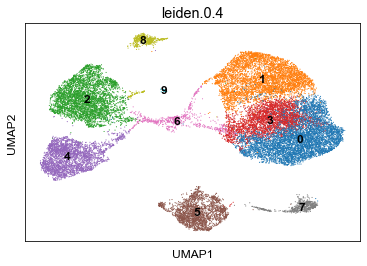

In [ ]:
sc.pl.umap(ad, color='leiden.0.4', legend_loc='on data')

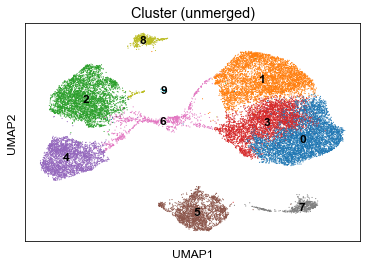

In [ ]:
sc.pl.umap(ad, color="leiden", title="Cluster (unmerged)", legend_loc="on data")

In [ ]:
singleCellTools.plotting.plotLabelPercentageInCluster(ad, 'leiden', 'Sample')

In [ ]:
singleCellTools.geneEnrichInfo.calculateEnrichScoreByCellex(
    ad, "raw", clusterName="leiden"
)

In [ ]:
dt_unmergedGeneMarker = (
    ad.uns["leiden_cellexES"]
    .query("enrichScore > 0.8")
    .groupby("leiden")
    .apply(lambda df: df.nlargest(5, "enrichScore")['gene'].to_list())
    .to_dict()
)

In [ ]:
# ad.uns["leiden_cellexES"].query("enrichScore > 0.8").rename(
#     columns={"leiden": "cluster (unmerged)"}
# ).eval(
#     "name = gene.map(@dt_locus2name) \n is_SNF_genes = gene.isin(@ls_snfGenes)",
#     engine="python",
# ).eval("name = name.fillna('')", engine="python").assign(
#     is_SNF_genes=lambda df: np.where(df["is_SNF_genes"], "True", "")
# ).to_excel(
#     f"{dir_result}/0708_unmerged_markers.xlsx"
# )

In [ ]:
sc.pl.dotplot(ad, dt_unmergedGeneMarker, "leiden", layer="normalize_log", cmap="Reds", standard_scale='var', dot_max=0.3)

In [ ]:
sc.pl.heatmap(ad, dt_unmergedGeneMarker, 'leiden', layer='normalize_log', cmap='Reds')

In [ ]:
ad.uns['leiden_cellexES'].sort_values(['leiden', 'enrichScore'], ascending=[True, False])

In [ ]:
_dt = {'0': '3'}
ad.obs['leiden_merged'] = ad.obs['leiden'].map(lambda x:_dt.get(x,x))
_dt = {'0 Unknown': '3 Cortex'}
ad.obs['ct_merged'] = ad.obs['Cell type'].map(lambda x:_dt.get(x,x))

In [ ]:
ad.uns['leiden_merged_colors'] = ad.uns['leiden_colors'][1:]

In [ ]:
ad.uns['ct_merged_colors'] = ad.uns['leiden_colors'][1:]

Text(0, 0.5, '')

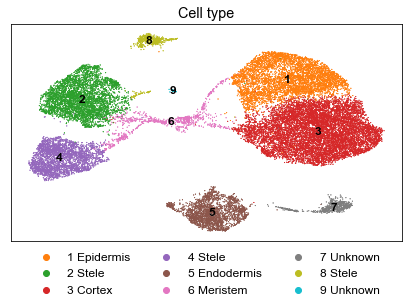

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))
sc.pl.umap(ad, color="leiden_merged", title="Cell type", legend_loc="on data", show=False, ax=ax)
sc.pl.umap(ad, color="ct_merged", title="Cell type", show=False, ax=ax)
plt.legend(ncol=3, loc='upper center', bbox_to_anchor=(0.5,0), frameon=False, prop={'size': 12})
plt.xlabel('')
plt.ylabel('')

Text(0, 0.5, '')

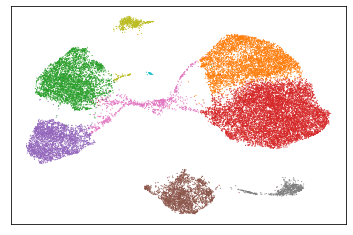

In [ ]:
ax = sc.pl.umap(ad, color="leiden_merged", title="Cell type", legend_loc=None, show=False)
plt.title('')
plt.xlabel('')
plt.ylabel('')

Text(0, 0.5, '')

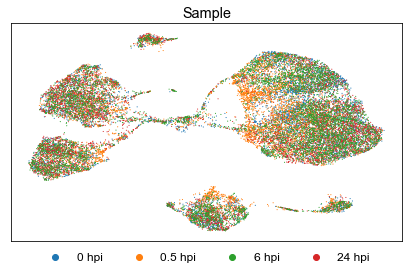

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))
sc.pl.umap(ad, color="Sample_4", title="Sample", show=False, ax=ax)
plt.legend(ncol=4, loc='upper center', bbox_to_anchor=(0.5,0), frameon=False, prop={'size': 12})
plt.xlabel('')
plt.ylabel('')

## plot markers

#### epidermis

In [ ]:
dt_markerGeneGroup = {
    "Epidermis": ["MTR_1g043220","MTR_6g029180","MTR_5g083030"]
}
dt_geneToNameMarker = {
    "MTR_1g043220": "MtPT1",
    "MTR_6g029180": "MtERN2",
    "MTR_5g083030": "MtPUB1"
}

In [ ]:
ls_genes = ["MTR_1g043220",  # # The spatial expression patterns of a phosphate transporter (MtPT1) from Medicago truncatula indicate a role in phosphate transport at the root/soil interface
'MTR_6g029180', # Medicago truncatula ERN Transcription Factors: Regulatory Interplay with NSP1/NSP2 GRAS Factors and Expression Dynamics throughout Rhizobial Infection
'MTR_5g083030'] # The Full-Size ABCG Transporter of Medicago truncatula Is Involved in Strigolactone Secretion, Affecting Arbuscular Mycorrhiza

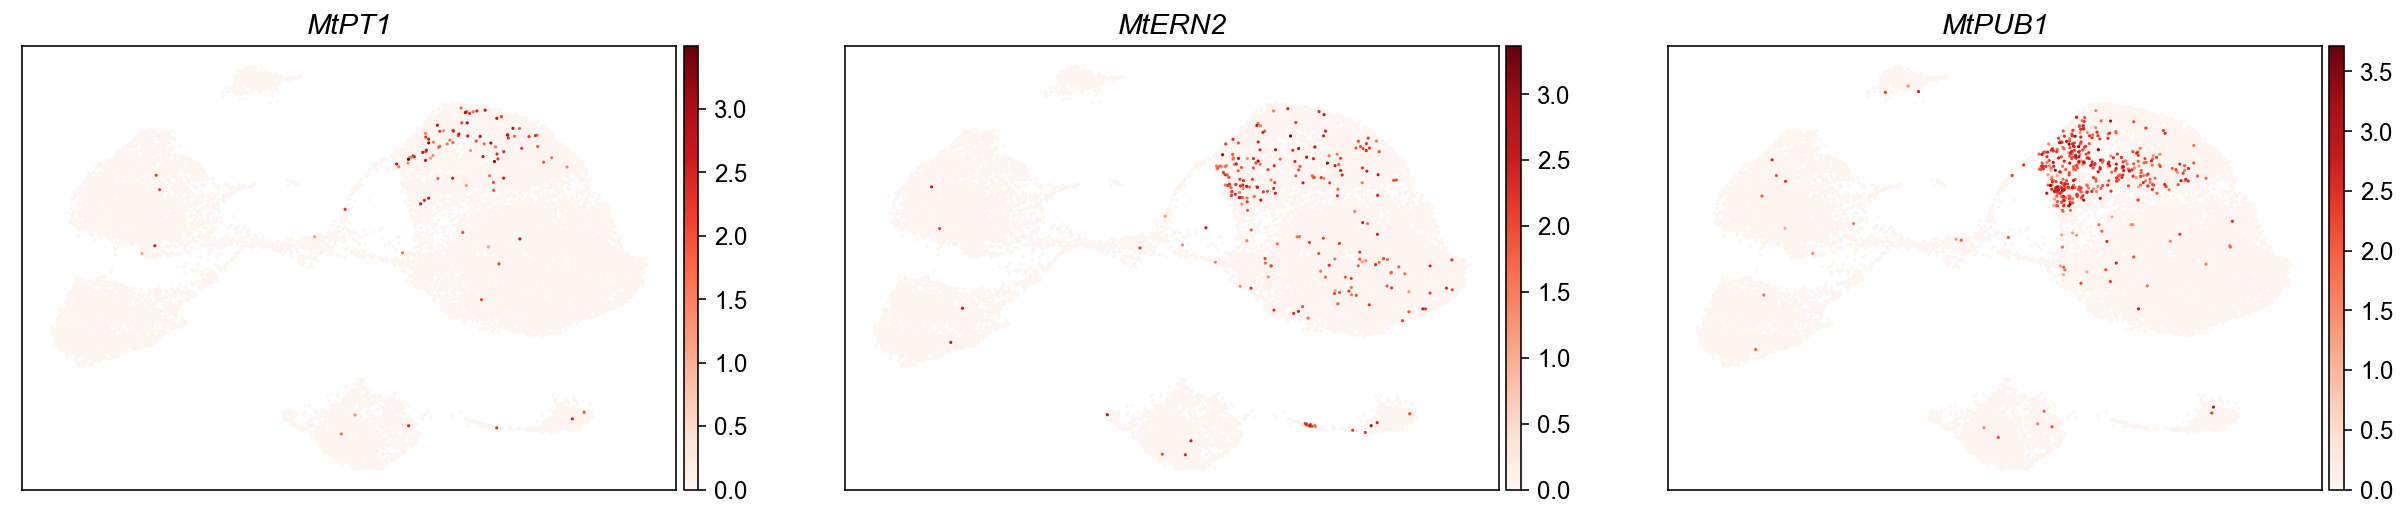

In [ ]:
axs = sc.pl.umap(ad, color=ls_genes, title=['MtPT1', 'MtERN2', 'MtPUB1'], layer="normalize_log", cmap="Reds", ncols=3, size=10, show=False)
for ax in axs:
    plt.sca(ax)
    plt.title(ax.get_title().replace('(', '\n('), style='italic')
    plt.xlabel('')
    plt.ylabel('')
plt.show()

#### meristem

In [ ]:
_dt_markerGeneGroup = {
    "Meristem": ["MTR_2g098180","MTR_5g031880","MTR_7g080460"]
}
_dt_geneToNameMarker = {
    "MTR_2g098180": "MtPLT1",
    "MTR_5g031880": "MtPLT3",
    "MTR_7g080460": "MtPLT4"
}

In [ ]:
dt_markerGeneGroup.update(_dt_markerGeneGroup)
dt_geneToNameMarker.update(_dt_geneToNameMarker)

In [ ]:
ls_genes = [
    'MTR_2g098180', # https://journals.biologists.com/dev/article/142/17/2941/46914/Root-developmental-programs-shape-the-Medicago
    "MTR_5g031880",
    "MTR_7g080460"
]

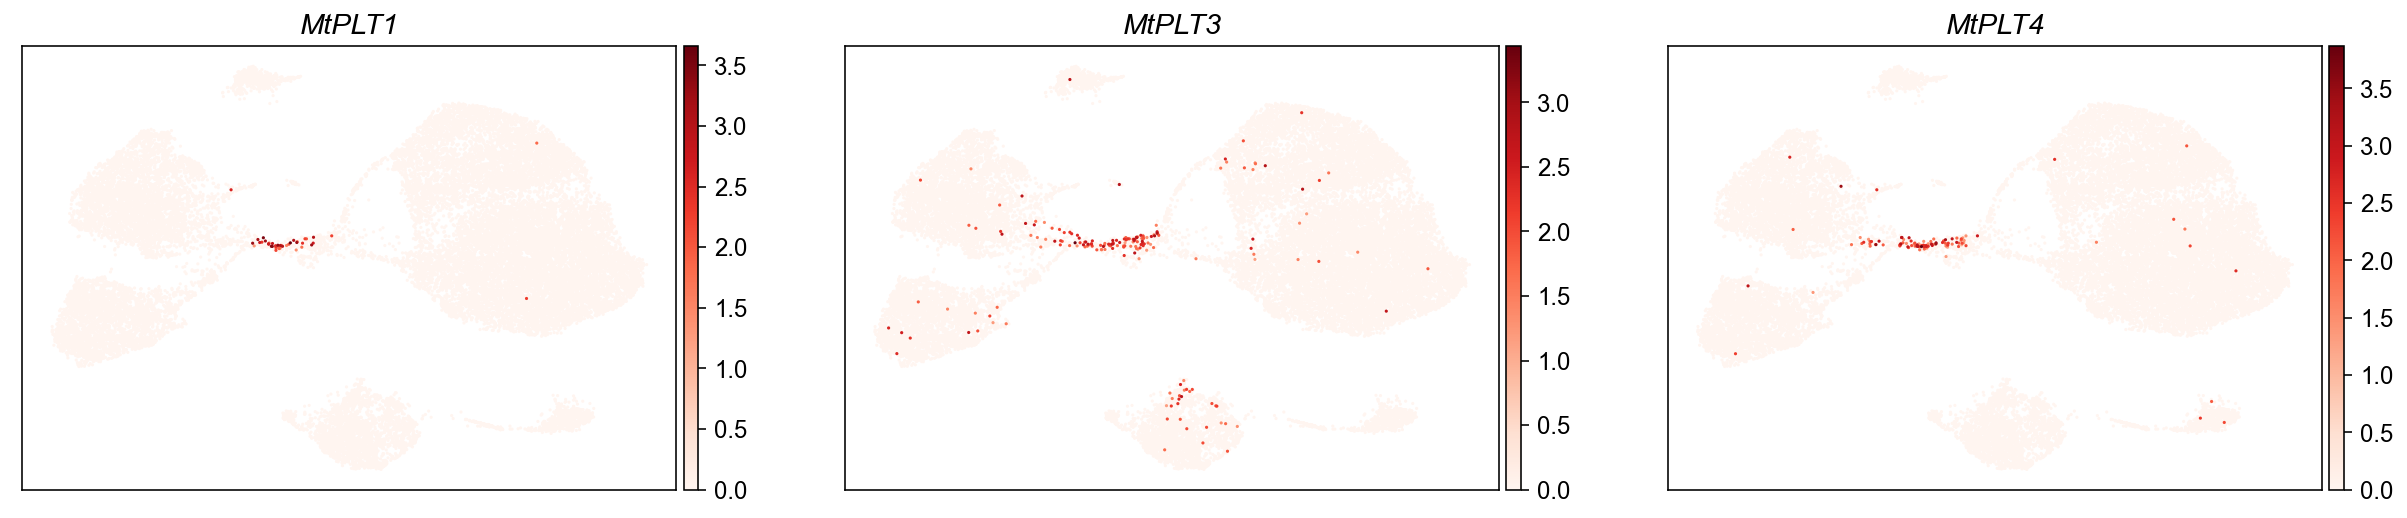

In [ ]:
axs = sc.pl.umap(ad, color=ls_genes, title=['MtPLT1', 'MtPLT3', 'MtPLT4'], layer="normalize_log", cmap="Reds", ncols=3, size=10, show=False)
for ax in axs:
    plt.sca(ax)
    plt.title(ax.get_title().replace('(', '\n('), style='italic')
    plt.xlabel('')
    plt.ylabel('')
plt.show()

#### Endodermis

In [ ]:
# "MtANN1":"MTR_8g038210",
# "MtCASPL-1(MTR_1g058540)": "MTR_1g058540",
# "MtCASPL-2(MTR_1g058560)": "MTR_1g058560",
# "MtCASPL-3(MTR_1g058570)": "MTR_1g058570",

1

In [ ]:
_dt_markerGeneGroup = {
    "Endodermis": ["MTR_8g038210","MTR_1g058560","MTR_7g074650"]
}
_dt_geneToNameMarker = {
    "MTR_8g038210": "MtANN1",
    "MTR_1g058560": "MtCASPL-2",
    "MTR_7g074650": "MtSCR"
}

dt_markerGeneGroup.update(_dt_markerGeneGroup)
dt_geneToNameMarker.update(_dt_geneToNameMarker)

In [ ]:
_ls_genes = ["MTR_8g038210","MTR_1g058540","MTR_1g058560"]

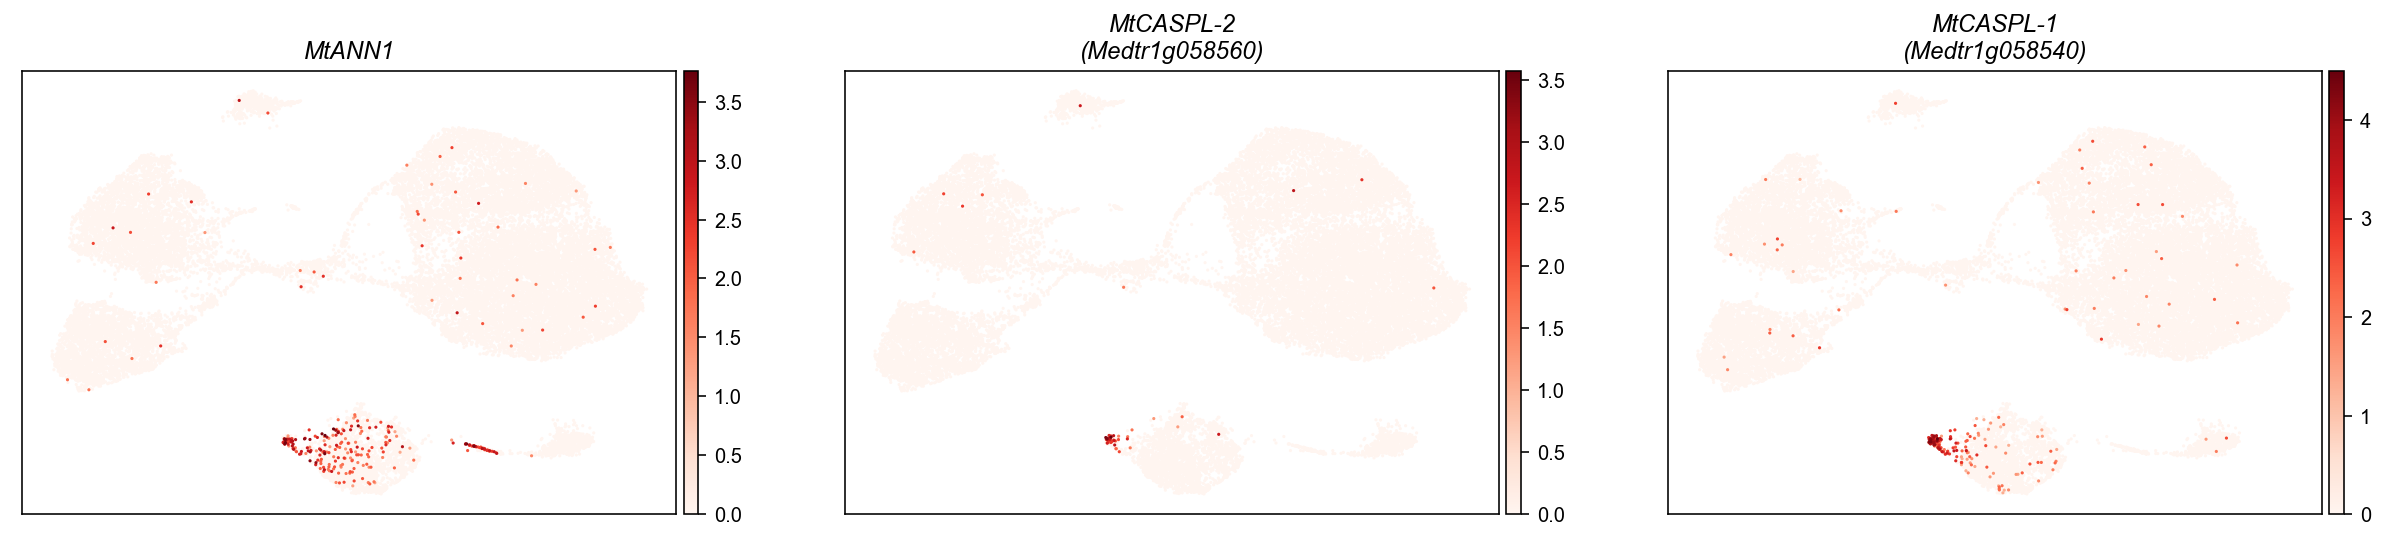

In [ ]:
axs = sc.pl.umap(
    ad,
    color=_ls_genes,
    title=["MtANN1", "MtCASPL-2(Medtr1g058560)", "MtCASPL-1(Medtr1g058540)"],
    layer="normalize_log",
    cmap="Reds",
    ncols=3,
    size=10,
    show=False,
)
for ax in axs:
    plt.sca(ax)
    plt.title(ax.get_title().replace("(", "\n("), style="italic")
    plt.xlabel("")
    plt.ylabel("")
plt.show()

#### CORTEX

In [ ]:
_dt_markerGeneGroup = {
    "Cortex": ["MTR_4g088195","MTR_4g088160","MTR_1g074930"]
}
_dt_geneToNameMarker = {
    "MTR_4g088195": "MtIFS1",
    "MTR_4g088160": "MtIFS3",
    "MTR_1g074930": "MtPT5"
}

In [ ]:
dt_markerGeneGroup.update(_dt_markerGeneGroup)
dt_geneToNameMarker.update(_dt_geneToNameMarker)

In [ ]:
    MtIFS1="MTR_4g088195",
    MtIFS3="MTR_4g088160",
    MtPT5="MTR_1g074930",

In [ ]:
_ls_genes = ["MTR_4g088195","MTR_4g088160","MTR_1g074930"]

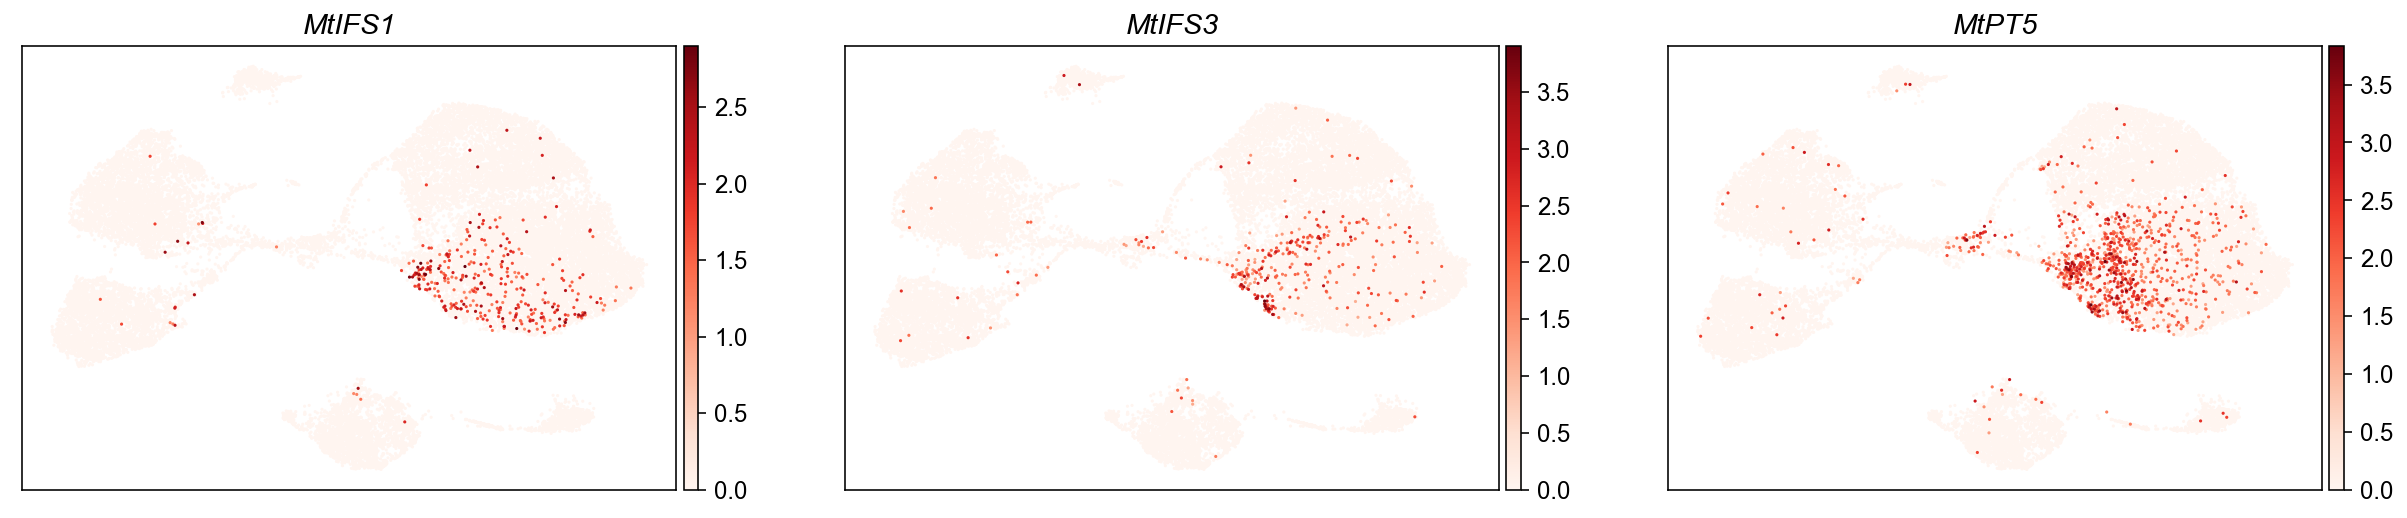

In [ ]:
axs = sc.pl.umap(ad, color=_ls_genes, title=['MtIFS1', 'MtIFS3', 'MtPT5'], layer="normalize_log", cmap="Reds", ncols=3, size=10, show=False)
for ax in axs:
    plt.sca(ax)
    plt.title(ax.get_title().replace('(', '\n('), style='italic')
    plt.xlabel('')
    plt.ylabel('')
plt.show()

#### STELE

In [ ]:
_dt_markerGeneGroup = {
    "Stele": ["MTR_5g015490","MTR_4g070970","MTR_1g041695"]
}
_dt_geneToNameMarker = {
    "MTR_5g015490": "MtSHR1",
    "MTR_4g070970": "MtSUNN",
    "MTR_1g041695": "MtPHO1.1"
}

In [ ]:
dt_markerGeneGroup.update(_dt_markerGeneGroup)
dt_geneToNameMarker.update(_dt_geneToNameMarker)

In [ ]:
_ls_genes = ["MTR_7g067450","MTR_4g070970","MTR_1g041695"]

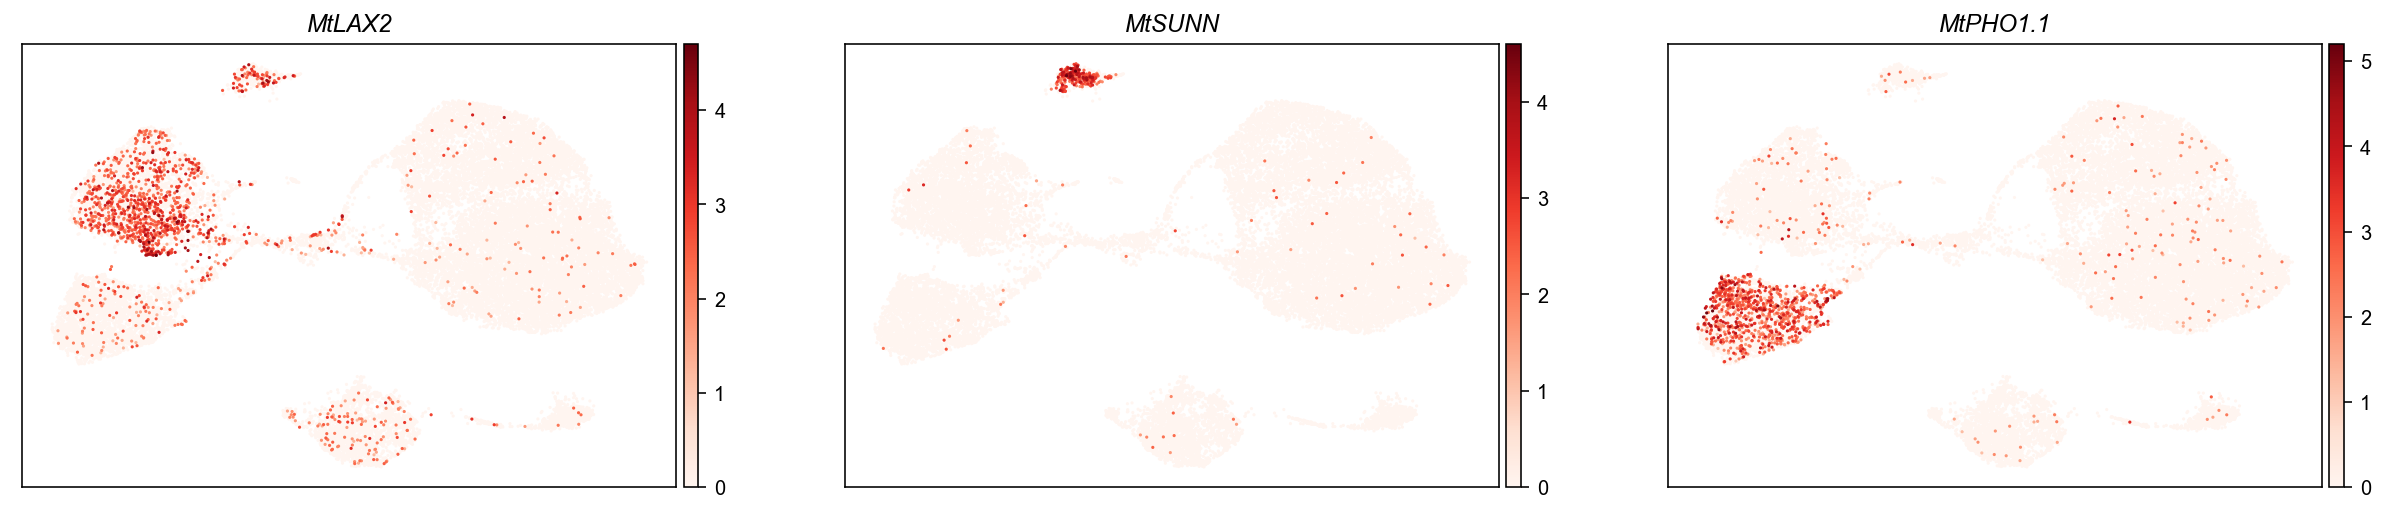

In [ ]:
axs = sc.pl.umap(ad, color=_ls_genes, title=['MtLAX2', 'MtSUNN', 'MtPHO1.1'], layer="normalize_log", cmap="Reds", ncols=3, size=10, show=False)
for ax in axs:
    plt.sca(ax)
    plt.title(ax.get_title().replace('(', '\n('), style='italic')
    plt.xlabel('')
    plt.ylabel('')
plt.show()

In [ ]:
dt_markerGeneGroup.update(_dt_markerGeneGroup)
dt_geneToNameMarker.update(_dt_geneToNameMarker)

In [ ]:
dt_markerGeneGroup = {
    'Epidermis': ['MTR_1g043220', 'MTR_6g029180', 'MTR_5g083030'],
    'Cortex': ['MTR_4g088195', 'MTR_4g088160', 'MTR_1g074930'],
    'Endodermis': ['MTR_8g038210', 'MTR_1g058560', 'MTR_7g074650'],
    'Meristem': ['MTR_2g098180', 'MTR_5g031880', 'MTR_7g080460'],
    'Stele': ['MTR_5g015490', 'MTR_4g070970', 'MTR_1g041695']
 }

In [ ]:
dt_geneToNameMarker

{'MTR_1g043220': 'MtPT1',
 'MTR_6g029180': 'MtERN2',
 'MTR_5g083030': 'MtPUB1',
 'MTR_2g098180': 'MtPLT1',
 'MTR_5g031880': 'MtPLT3',
 'MTR_7g080460': 'MtPLT4',
 'MTR_8g038210': 'MtANN1',
 'MTR_1g058560': 'MtCASPL-2',
 'MTR_7g074650': 'MtSCR',
 'MTR_4g088195': 'MtIFS1',
 'MTR_4g088160': 'MtIFS3',
 'MTR_1g074930': 'MtPT5',
 'MTR_5g015490': 'MtSHR1',
 'MTR_4g070970': 'MtSUNN',
 'MTR_1g041695': 'MtPHO1.1'}

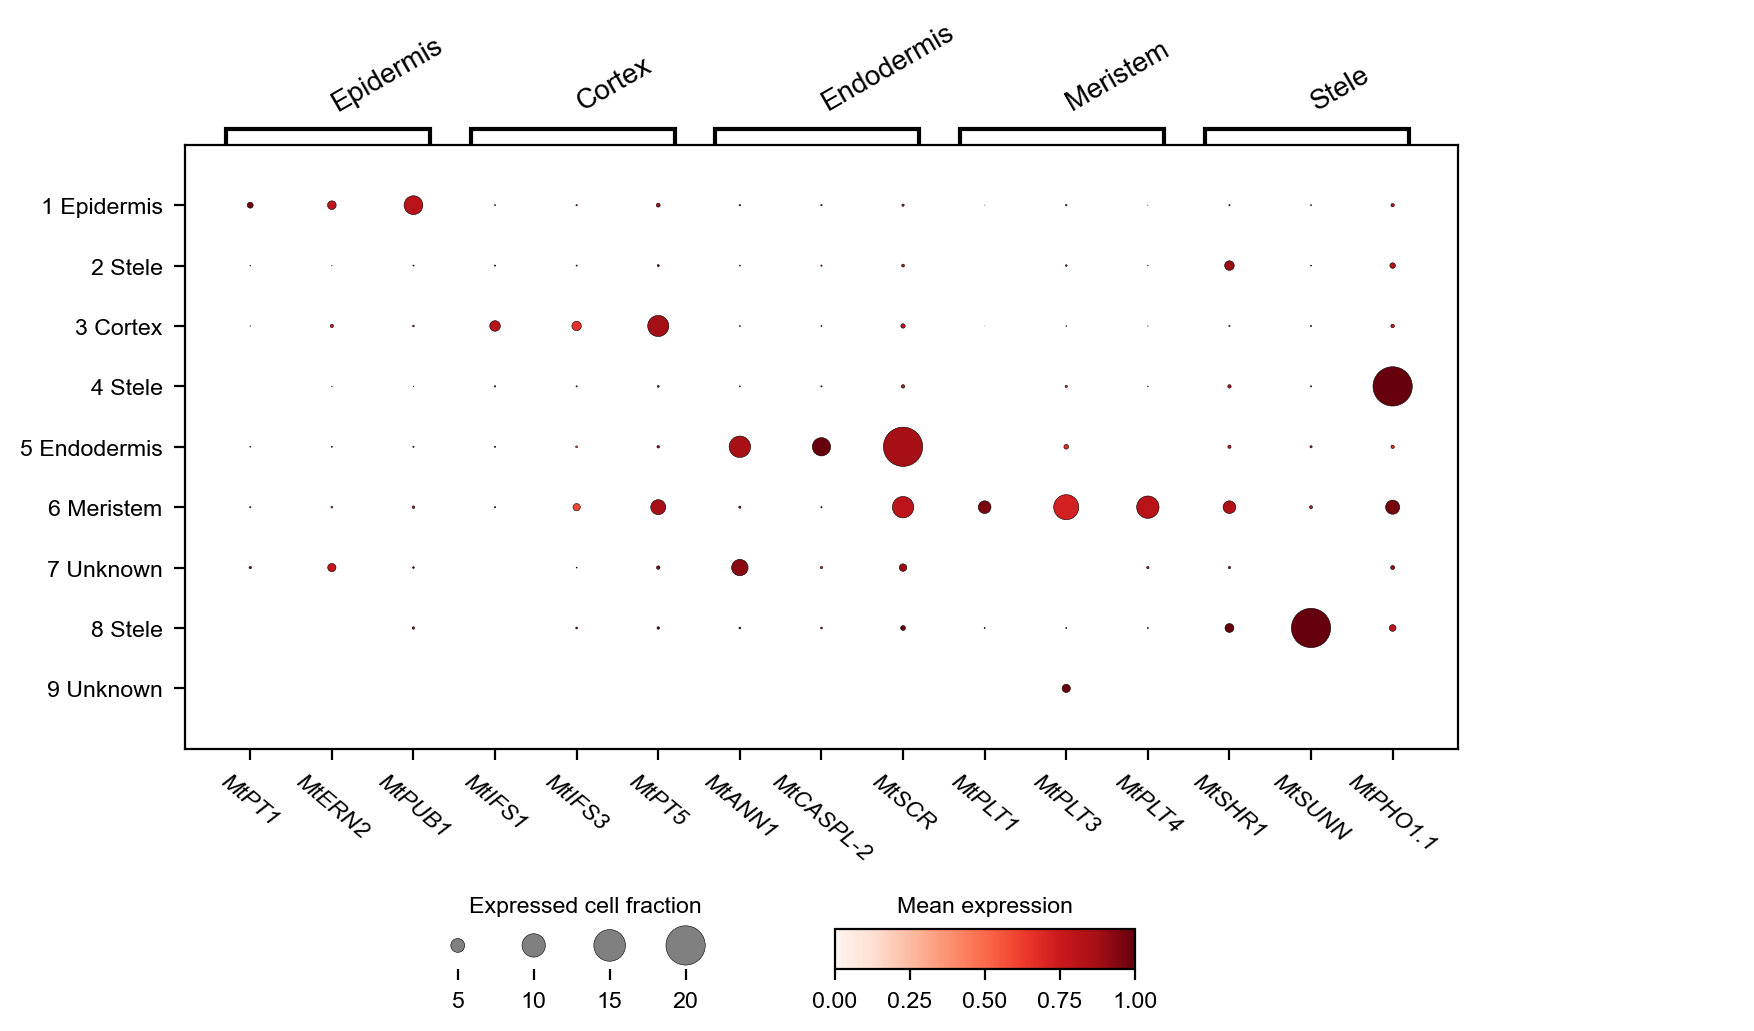

In [ ]:
with plt.rc_context({"figure.dpi": 100}):
    axs = sc.pl.dotplot(
        ad,
        dt_markerGeneGroup,
        groupby="ct_merged",
        layer="normalize_log",
        dot_max=0.2, standard_scale='var',
        show=False,
        mean_only_expressed=True,
        size_title='Expressed cell fraction',
        colorbar_title='Mean expression',
        figsize = (10,4)
    )

    ax = axs["mainplot_ax"]
    plt.sca(ax)

    _ls_mask = [6,8]
    plt.xticks(
        ax.get_xticks(),
        ax.get_xticklabels() | F(map, lambda x: dt_geneToNameMarker[x.get_text()]) | F(map, lambda x: x.split('(')[0]),
        style="italic", rotation=-40, ha='center'
    )
    # ax.get_xticklabels()[7].set_text('CASPs')
    # ax.set_xticklabels(ax.get_xticklabels())
    # # ax.tick_params(axis='x', direction='in')
    # ax.xaxis.set_ticks_position('none') 


    ax = axs['gene_group_ax']
    plt.sca(ax)
    ax.texts | F(map, lambda x: x.set_rotation(30)) | F(list)
    ax.texts | F(map, lambda x: x.set_ha('left')) | F(list)
    axs['size_legend_ax'].set_position([0.25, -0.15, 0.15, 0.1])
    axs['color_legend_ax'].set_position([0.45, -0.15, 0.15, 0.05])
    plt.show()

## get cluster spercfic gene

### merged

In [ ]:
singleCellTools.geneEnrichInfo.calculateEnrichScoreByCellex(
    ad, "raw", clusterName="leiden_merged"
)

In [ ]:
df_illuMarker = ad.uns['leiden_merged_cellexES'].query("enrichScore > 0.8")

In [ ]:
# ad.uns["leiden_merged_cellexES"].query("enrichScore > 0.8").rename(
#     columns={"leiden": "cluster (unmerged)"}
# ).eval(
#     "name = gene.map(@dt_locus2name) \n is_SNF_genes = gene.isin(@ls_snfGenes)",
#     engine="python",
# ).eval("name = name.fillna('')", engine="python").assign(
#     is_SNF_genes=lambda df: np.where(df["is_SNF_genes"], "True", "")
# ).to_excel(
#     f"{dir_result}/0708_merged_markers.xlsx"
# )

In [ ]:
dt_specficGenes = df_illuMarker.groupby("leiden_merged")["gene"].agg(list).to_dict()

In [ ]:
gene = 'MTR_4g023950'
name = 'MTR_4g023950'

In [ ]:
_ls_allGenes = sum(list(dt_specficGenes.values()), [])

In [ ]:
import adjustText
import importlib
importlib.reload(adjustText)

<module 'adjustText' from '/public1/software/liuzj/github/adjustText/adjustText/__init__.py'>

In [ ]:
from adjustText import adjust_text

100


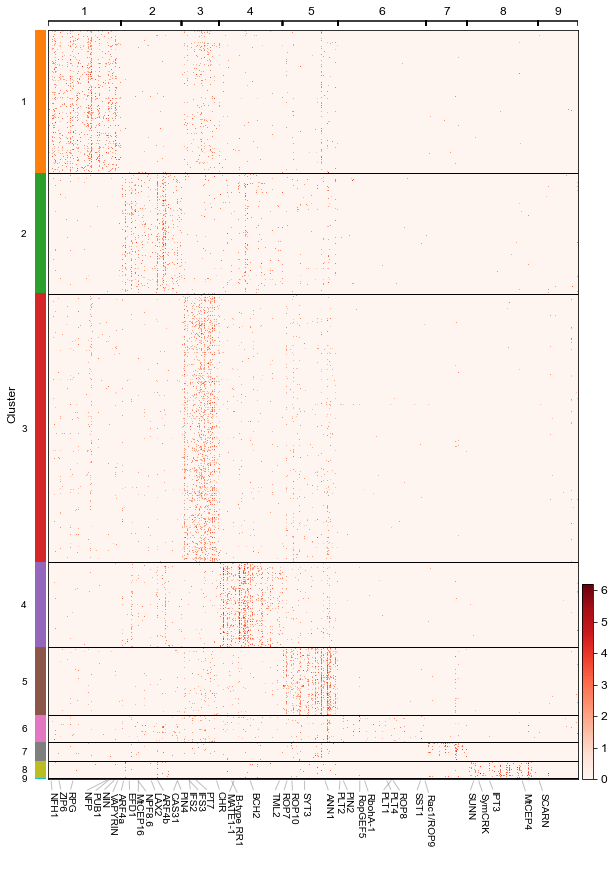

In [ ]:
axs = sc.pl.heatmap(
    ad,
    df_illuMarker.groupby("leiden_merged")["gene"].agg(list).to_dict(),
    "leiden_merged",
    layer="normalize_log",
    cmap="Reds",
    figsize=(10, 14),
    show=False,
)
plt.sca(axs["groupby_ax"])
plt.ylabel("Cluster")

pos_axHeatmap = axs["heatmap_ax"].get_position()
fig = axs["heatmap_ax"].figure
ax = fig.add_axes([0, 1, 1, 1])
plt.sca(ax)
ax.set_position(
    [
        pos_axHeatmap.x0,
        pos_axHeatmap.y0 - 0.1,
        pos_axHeatmap.x1 - pos_axHeatmap.x0,
        0.1,
    ]
)
plt.xlim(axs["heatmap_ax"].get_xlim())
plt.ylim((0, 100))

ls_text = []
for gene in [x for x in _ls_allGenes if x in ls_snfGenes]:
    name = dt_locus2name[gene]
    pos = _ls_allGenes.index(gene)
    text = plt.text(
        pos, 100, name, ha="center", va="top", rotation=-90, fontdict=dict(size=10)
    )
    ls_text.append(text)
# adjust_text(
#     ls_text,
#     arrowprops=dict(arrowstyle="-", color="black", lw=0.5),
#     force_text=(0.75, 0.1),
#     ha="center",
#     va="top",
#     expand_text=(1.05, 1.05),
#     precision=0.0001,
# )
x = adjust_text(
    ls_text,
    x=np.array(
        np.meshgrid(
            np.linspace(*axs["heatmap_ax"].get_xlim(), 100), np.linspace(90, 100, 10)
        )
    ).T.reshape(-1, 2)[:, 0],
    y=np.array(
        np.meshgrid(
            np.linspace(*axs["heatmap_ax"].get_xlim(), 100), np.linspace(90, 100, 10)
        )
    ).T.reshape(-1, 2)[:, 1],
    lim=100,
    force_text=(0.5, 0),
    force_points=(0, 0.1),
    expand_text=(1, 1),
    arrowprops=dict(arrowstyle="-", color="gray", alpha=0.5), ha='center', va='top',
    precision=0.001, arrow_bbox_pos=(0.5,1)
)
print(x)
plt.axis("off")
plt.show()

100


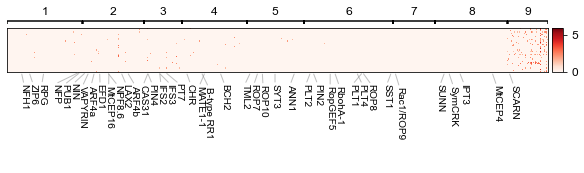

In [ ]:
axs = sc.pl.heatmap(
    ad[ad.obs.eval("leiden_merged == '9'")],
    df_illuMarker.groupby("leiden_merged")["gene"].agg(list).to_dict(),
    "leiden_merged",
    layer="normalize_log",
    cmap="Reds", figsize=(10,1), show=False, vmax=6
)
# plt.sca(axs['groupby_ax'])
plt.ylabel("Cluster")


fig = axs["heatmap_ax"].figure
ax = fig.add_axes([0, 1, 1, 1])
plt.sca(ax)
ax.set_position(
    [
        pos_axHeatmap.x0,
        pos_axHeatmap.y0 -1.3,
        pos_axHeatmap.x1 - pos_axHeatmap.x0,
        1.3,
    ]
)
plt.xlim(axs["heatmap_ax"].get_xlim())
plt.ylim((0, 100))

ls_text = []
for gene in [x for x in _ls_allGenes if x in ls_snfGenes]:
    name = dt_locus2name[gene]
    pos = _ls_allGenes.index(gene)
    text = plt.text(
        pos, 100, name, ha="center", va="top", rotation=-90, fontdict=dict(size=10)
    )
    ls_text.append(text)
# adjust_text(
#     ls_text,
#     arrowprops=dict(arrowstyle="-", color="black", lw=0.5),
#     force_text=(0.75, 0.1),
#     ha="center",
#     va="top",
#     expand_text=(1.05, 1.05),
#     precision=0.0001,
# )
x = adjust_text(
    ls_text,
    x=np.array(
        np.meshgrid(
            np.linspace(*axs["heatmap_ax"].get_xlim(), 100), np.linspace(90, 100, 10)
        )
    ).T.reshape(-1, 2)[:, 0],
    y=np.array(
        np.meshgrid(
            np.linspace(*axs["heatmap_ax"].get_xlim(), 100), np.linspace(90, 100, 10)
        )
    ).T.reshape(-1, 2)[:, 1],
    lim=100,
    force_text=(0.5, 0),
    force_points=(0, 0.1),
    expand_text=(1, 1),
    arrowprops=dict(arrowstyle="-", color="gray", alpha=0.5), ha='center', va='top',
    precision=0.001, arrow_bbox_pos=(0.5,1)
)
print(x)
plt.axis("off")
plt.show()

In [ ]:
lsDf_allResponseGo = []
for cellType, ls_genes in dt_specficGenes.items():
#     _ad = ad[ad.obs.eval('ct_merged == @cellType')]
#     _ad.X = _ad.layers['raw'].copy()
#     sc.pp.filter_genes(_ad, min_counts=3)
    df_go = enrichmentAnalysisGO(ls_genes, ad.var.index.to_list()).assign(category = cellType)
    if df_go.empty:
        continue
    fig, ax = plt.subplots(figsize=(2, df_go.shape[0] * 0.2))
    df_go['Description'] = df_go['Description'].str.split(r' \(').str[0]
    sns.barplot(data=df_go, x="-log10Pvalue", y="Description", hue = 'Category', ax=ax, dodge=False)
    ax.get_legend().remove()
#     plt.legend(loc='lower left', bbox_to_anchor=[-1.2,-0.4], ncol=3, frameon=False)
    plt.ylabel('')
    sns.despine(top=True, right=True)
    plt.title(cellType)
    plt.show()
    lsDf_allResponseGo.append(df_go)

### separately

In [ ]:
import importlib
importlib.reload(singleCellTools.geneEnrichInfo)

In [ ]:
singleCellTools.geneEnrichInfo.calculateEnrichScoreByCellex(
    ad,
    "raw",
    clusterName="leiden_merged",
    batchKey="Sample",
    kayAddedPrefix="leiden_merged_sample_separately",
)

100%|██████████| 4/4 [10:57<00:00, 164.38s/it]


In [ ]:
df_cellexInfoSampleSepately = pd.concat(
    [
        y.assign(Sample=x)
        for x, y in ad.uns["leiden_merged_sample_separately_cellexES"].items()
    ]
).query("enrichScore > 0.8")

In [ ]:
df_illuMarkerAllStage = pd.concat(
    [df_illuMarker.assign(Sample="All"), df_cellexInfoSampleSepately]
)

In [ ]:
for sample in ls_sample:

    dt_stageClusterSpecficGenes = df_cellexInfoSampleSepately.query("Sample == @sample & leiden_merged != '9'").groupby("leiden_merged")["gene"].agg(list).to_dict()

    _ls_allGenes = sum(list(dt_stageClusterSpecficGenes.values()), [])

    axs = sc.pl.heatmap(
        ad[ad.obs.eval("Sample == @sample & leiden_merged != '9'")],
        df_cellexInfoSampleSepately.query("Sample == @sample & leiden_merged != '9'").groupby("leiden_merged")["gene"].agg(list).to_dict(),
        "leiden_merged",
        layer="normalize_log",
        cmap="Reds",
        figsize=(10, 6),
        show=False,
    )
    plt.sca(axs["groupby_ax"])
    plt.ylabel("Cluster")

    fig = axs["heatmap_ax"].figure
    ax = fig.add_axes([0, 1, 1, 1])
    plt.sca(ax)
    ax.set_position(
        [
            pos_axHeatmap.x0,
            pos_axHeatmap.y0 - 0.3,
            pos_axHeatmap.x1 - pos_axHeatmap.x0,
            0.3,
        ]
    )
    plt.xlim(axs["heatmap_ax"].get_xlim())
    plt.ylim((0, 100))

    ls_text = []
    for gene in [x for x in _ls_allGenes if x in ls_snfGenes]:
        name = dt_locus2name[gene]
        pos = _ls_allGenes.index(gene)
        text = plt.text(
            pos, 100, name, ha="center", va="top", rotation=-90, fontdict=dict(size=10)
        )
        ls_text.append(text)
    # adjust_text(
    #     ls_text,
    #     arrowprops=dict(arrowstyle="-", color="black", lw=0.5),
    #     force_text=(0.75, 0.1),
    #     ha="center",
    #     va="top",
    #     expand_text=(1.05, 1.05),
    #     precision=0.0001,
    # )
    x = adjust_text(
        ls_text,
        x=np.array(
            np.meshgrid(
                np.linspace(*axs["heatmap_ax"].get_xlim(), 500), np.linspace(90, 100, 20)
            )
        ).T.reshape(-1, 2)[:, 0],
        y=np.array(
            np.meshgrid(
                np.linspace(*axs["heatmap_ax"].get_xlim(), 500), np.linspace(90, 100, 20)
            )
        ).T.reshape(-1, 2)[:, 1],
        lim=1000,
        force_text=(0.3, 0),
        force_points=(0, 0.01),
        expand_text=(1.1, 1),
        arrowprops=dict(arrowstyle="-", color="gray", alpha=0.5), ha='center', va='top',
        precision=0.0001, arrow_bbox_pos=(0.5,1)
    )
    plt.axis("off")
    print(x)
    plt.show()

In [ ]:
dt_stageClusterSpecficGenes = df_cellexInfoSampleSepately.query("Sample == @sample & leiden_merged != '9'").groupby("leiden_merged")["gene"].agg(list).to_dict()

In [ ]:
df_specficGeneCounts = pd.concat(
    [
#         df_illuMarker.groupby("leiden_merged")["gene"]
#         .agg(len)
#         .rename("Gene counts")
#         .reset_index()
#         .assign(Sample="All"),
        df_cellexInfoSampleSepately.groupby(["Sample", "leiden_merged"])["gene"]
        .agg(len)
        .rename("Gene counts")
        .reset_index(),
    ]
)

In [ ]:
df_specficGeneCounts

,Sample,leiden_merged,Gene counts
0,0.5 hpi,1,251
1,0.5 hpi,2,258
2,0.5 hpi,3,168
3,0.5 hpi,4,221
4,0.5 hpi,5,172
5,0.5 hpi,6,184
6,0.5 hpi,7,140
7,0.5 hpi,8,174
8,0.5 hpi,9,125
9,24 hpi,1,204


In [ ]:
_dt = {'Mock': '0 hpi'}
ls_sample = ['0 hpi', '0.5 hpi', '6 hpi', '24 hpi']
df_specficGeneCounts = df_specficGeneCounts.assign(Sample = lambda df:df['Sample'].map(lambda x:_dt.get(x,x))).assign(Sample = lambda df:df['Sample'].astype('category').cat.set_categories(ls_sample))

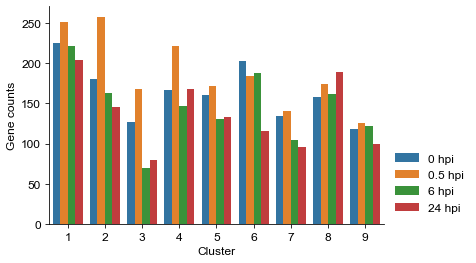

In [ ]:
sns.barplot(data=df_specficGeneCounts, x="leiden_merged", y="Gene counts", hue="Sample")
plt.legend(loc='lower left', bbox_to_anchor=(1,0), frameon=False)
sns.despine()
plt.xlabel('Cluster')
plt.show()

In [ ]:
dt_allStageSpecficSnfGenes = (
    df_cellexInfoSampleSepately.query("gene in @ls_snfGenes")
    .groupby("leiden_merged")["gene"]
    .agg(lambda x: list(set(x)))
    .to_dict()
)

In [ ]:
dt_allStageSpecficSnfGenes.values()|F(list)|F(lambda  x: sum(x, [])) |F(len)

In [ ]:
from itertools import product

_ls_cat = [
    f"{x}:{y}" for x, y in product(ad.obs["leiden_merged"].cat.categories, ls_sample)
]

In [ ]:
ad.obs = ad.obs.assign(
    cluster_merged_sample=lambda df: (
        df["leiden_merged"].astype(str) + ":" + df["Sample"].astype(str)
    )
    .astype("category")
    .cat.set_categories(_ls_cat)
)

In [ ]:
sc.pl.dotplot(ad, dt_allStageSpecficSnfGenes, 'cluster_merged_sample', layer='normalize_log', standard_scale='var', dot_max=0.3)

## GO

In [ ]:

for cellType in df_illuMarkerAllStage['leiden_merged'].unique():
    lsDf_clusterSpecificGenes = []
    _df = df_illuMarkerAllStage.query("leiden_merged == @cellType & Sample != 'All'")
    dt_stageMarker = df_illuMarkerAllStage.groupby("Sample")['gene'].agg(list).to_dict()
    for stage, ls_gene in dt_stageMarker.items():
        df_go = enrichmentAnalysisGO(ls_gene, ad.var.index.to_list()).assign(stage = stage)
        if df_go.empty:
            continue
        lsDf_clusterSpecificGenes.append(df_go)
    df_clusterSpecificGo = pd.concat(lsDf_clusterSpecificGenes)
    df_clusterSpecificGo['stage'] = df_clusterSpecificGo['stage'].astype("category").cat.set_categories(ls_sample)
    break

In [ ]:
ls_useGo = df_clusterSpecificGo.groupby('ID')['-log10Pvalue'].agg('max').loc[lambda sr:sr > 3].index.to_list()
df_clusterSpecificGo = df_clusterSpecificGo.query("ID in @ls_useGo")
fig, ax = plt.subplots(
    figsize=(4, len(df_clusterSpecificGo["Description"].unique()) * 0.3)
)
sns.scatterplot(
    data=df_clusterSpecificGo.sort_values(["Category", "stage", "p.adjust"]),
    x="stage",
    y="Description",
    size="-log10Pvalue",
    sizes=(20, 200),
    hue="Category",
    legend="full",
)
handles, labels = ax.get_legend_handles_labels()
pvalueStartPos = labels.index("-log10Pvalue") + 1
handles1, handles = handles[:pvalueStartPos], handles[pvalueStartPos:]
labels1, labels = labels[:pvalueStartPos], labels[pvalueStartPos:]
labels = np.array([float(l) for l in labels])
desired_labels = list(range(int(df_clusterSpecificGo["-log10Pvalue"].min()), int(df_clusterSpecificGo["-log10Pvalue"].max()) + 1, 3))
desired_handles = [handles[np.argmin(np.abs(labels - d))] for d in desired_labels]
desired_labels = [*labels1, *desired_labels]
desired_handles = [*handles1, *desired_handles]

ax.legend(
    loc="lower left",
    bbox_to_anchor=(1, 0),
    frameon=False,
    handles=desired_handles,
    labels=desired_labels,
    title=ax.legend_.get_title().get_text(),
)
plt.ylabel("")
plt.xlabel("")
plt.show()

In [ ]:
labels

## Known SNF

In [ ]:
df_illuMarker = ad.uns['leiden_merged_cellexES'].query("enrichScore > 0.8")

In [ ]:
dt_markgenes = (
    df_illuMarker.sort_values("enrichScore", ascending=False)
    .eval("cluster = `leiden_merged`.str.split(' ').str[0]", engine="python")
    .groupby("cluster")["gene"]
    .agg(list)
    .to_dict()
)

In [ ]:
dt_markgenesKnownSnf = {x:[z for z in y if z in ls_snfGenes] for x,y in dt_markgenes.items()}

In [ ]:
dt_markergeneSnfRatio = {
    x: len(dt_markgenesKnownSnf[x]) / len(dt_markgenes[x]) for x in dt_markgenes.keys()
}

Text(0.5, 1.2, 'Known SNF genes propotion (es > 0.8)')

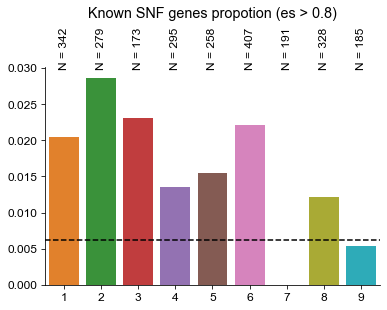

In [ ]:
ax = sns.barplot(
    x=list(dt_markergeneSnfRatio.keys()),
    y=list(dt_markergeneSnfRatio.values()),
    palette=singleCellTools.basic.getadataColor(ad, "leiden_merged").values(),
)
for i, label in enumerate(ax.get_xticklabels()):
    text = label.get_text()
    geneCounts = len(dt_markgenes[text])
    plt.text(
        i,
        1,
        f"N = {geneCounts}",
        transform=ax.get_xaxis_transform(),
        rotation=90,
        ha="center",
    )
plt.axhline(len(ls_snfGenes) / ad.shape[1], ls="--", color="black")
sns.despine()
plt.title("Known SNF genes propotion (es > 0.8)", y=1.2)

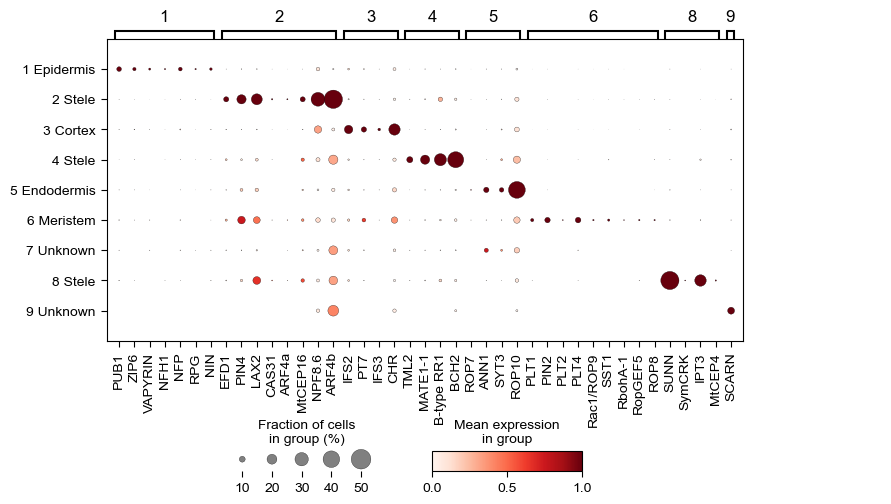

In [ ]:
with plt.rc_context({"figure.dpi": 100}):
    axs = sc.pl.dotplot(
        ad,
        {x: y for x, y in dt_markgenesKnownSnf.items() if y},
        "ct_merged",
        layer="normalize_log",
        cmap="Reds",
        standard_scale="var",
        figsize=(10, 4),
        show=False,
    )
    plt.sca(axs["mainplot_ax"])
    ls_originXLabel = (
        axs["mainplot_ax"].get_xticklabels() | F(map, lambda x: x.get_text()) | F(list)
    )
    plt.xticks(
        range(len(ls_originXLabel)) | F(map, lambda x: x + 0.5) | F(list),
        ls_originXLabel | F(map, lambda x: dt_locus2name[x]),
    )

    axs['size_legend_ax'].set_position([0.25, -0.2, 0.15, 0.1])
    axs['color_legend_ax'].set_position([0.45, -0.2, 0.15, 0.05])
    plt.show()

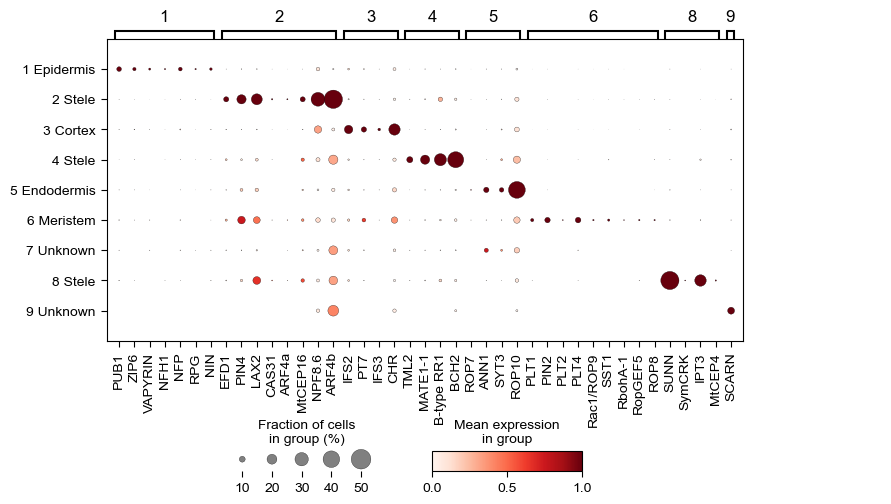

In [ ]:
with plt.rc_context({"figure.dpi": 100}):
    axs = sc.pl.dotplot(
        ad,
        {x: y for x, y in dt_markgenesKnownSnf.items() if y},
        "ct_merged",
        layer="normalize_log",
        cmap="Reds",
        standard_scale="var",
        figsize=(10, 4),
        show=False,
    )
    plt.sca(axs["mainplot_ax"])
    ls_originXLabel = (
        axs["mainplot_ax"].get_xticklabels() | F(map, lambda x: x.get_text()) | F(list)
    )
    plt.xticks(
        range(len(ls_originXLabel)) | F(map, lambda x: x + 0.5) | F(list),
        ls_originXLabel | F(map, lambda x: dt_locus2name[x]),
    )

    axs['size_legend_ax'].set_position([0.25, -0.2, 0.15, 0.1])
    axs['color_legend_ax'].set_position([0.45, -0.2, 0.15, 0.05])
    plt.show()

## reclustering epi

In [ ]:
ad

In [ ]:
sc.pl.umap(ad, color="leiden_merged", legend_loc="on data", show=False)
sns.despine()
plt.title('Cluster')
plt.show()

In [ ]:
ad_epi = ad[ad.obs.eval("leiden_merged == '1'")]

In [ ]:
ad_epi.X = ad_epi.layers['raw'].copy()
sc.pp.filter_genes(ad_epi, min_cells=10)
sc.pp.highly_variable_genes(ad_epi, layer="raw", n_top_genes=3000, flavor="seurat_v3", batch_key='Sample')
ad_epi.X = ad_epi.layers['normalize_log'].copy()
sc.tl.pca(ad_epi)
sc.pl.pca_variance_ratio(ad_epi, 50)

In [ ]:
sc.pp.neighbors(ad_epi, n_pcs=10)
sc.tl.umap(ad_epi)
sc.pl.umap(ad_epi, color='Sample')

In [ ]:
import scanpy.external as sce

In [ ]:
# scvi always reported a weild error, try to use harmony as alternative
ad_epi.obsm['X_pca_10'] = ad_epi.obsm['X_pca'][:, :10]
sce.pp.harmony_integrate(ad_epi, key='Sample', basis='X_pca_10')
sc.pp.neighbors(ad_epi, use_rep='X_pca_harmony')
sc.tl.umap(ad_epi, 0.1)
sc.tl.leiden(ad_epi, resolution=0.1)

In [ ]:
ad_epi.obs['leiden'] = '1-' + ad_epi.obs['leiden'].astype(str)

In [ ]:
_ls = """MTR_4g023950
MTR_2g035120
MTR_5g074740
MTR_1g100667
MTR_1g072570
MTR_1g106470
MTR_7g056620
MTR_8g010030""".split()

In [ ]:
ad_epi.uns['leiden_colors'] = ['#EF6600', '#FFC600']

In [ ]:
sc.pl.umap(ad_epi, color="leiden",show=False)
sns.despine(left=True, bottom=True)
plt.title('Sub-cluster of epidermis')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [ ]:
sc.pl.umap(ad_epi, color='labelTransfer_scanvi_celltype.anno')

<AxesSubplot:xlabel='Leiden', ylabel='Percentage'>

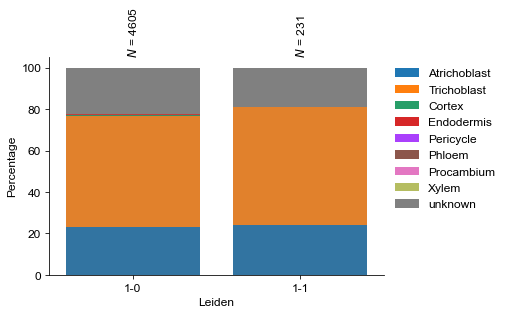

In [ ]:
singleCellTools.plotting.plotLabelPercentageInCluster(ad_epi, 'leiden', 'labelTransfer_scanvi_celltype.anno')

In [ ]:
sc.pl.umap(ad_epi, color=["MTR_4g074960"],show=False, layer='normalize_log', cmap='Reds')
sns.despine(left=True, bottom=True)
plt.show()

In [ ]:
sc.pl.umap(ad_epi, color=["MTR_5g011210"],show=False, layer='normalize_log', cmap='Reds')
sns.despine(left=True, bottom=True)
plt.show()

Text(0, 0.5, 'Subcluster')

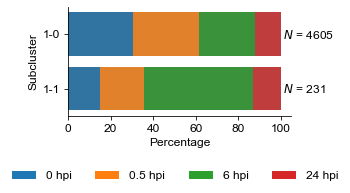

In [ ]:
# fig, ax = plt.subplots(figsize=(4, 2))
# singleCellTools.plotting.plotLabelPercentageInCluster(
#     ad_epi,
#     "leiden",
#     "Sample",
#     swapAxes=True,
#     dt_kwargsForLegend=dict(ncol=4, loc="lower left", bbox_to_anchor=(-0.3, -0.7)),
# )
# plt.ylabel("Subcluster")

fig, ax = plt.subplots(figsize=(4, 2))
singleCellTools.plotting.plotLabelPercentageInCluster(
    ad_epi,
    "leiden",
    "Sample_4",
    swapAxes=True,
    dt_kwargsForLegend=dict(ncol=4, loc="lower left", bbox_to_anchor=(-0.3, -0.7)),
)
plt.ylabel("Subcluster")

In [ ]:
ad.obs["leiden_subEpi"] = np.where(
    ad.obs["leiden_merged"] == "1", ad_epi.obs["leiden"].reindex(ad.obs.index), ad.obs["leiden_merged"]
)

In [ ]:
sc.pl.umap(ad, color='leiden_subEpi')

In [ ]:
singleCellTools.geneEnrichInfo.calculateEnrichScoreByCellex(
    ad, "raw", clusterName="leiden_subEpi"
)

In [ ]:
ad.uns["leiden_merged_cellexES"].query(
    "enrichScore > 0.8 & `leiden_merged` == '1'"
).shape, ad.uns["leiden_subEpi_cellexES"].query(
    "enrichScore > 0.8 & leiden_subEpi == '1-1'"
).shape, ad.uns[
    "leiden_subEpi_cellexES"
].query(
    "enrichScore > 0.8 & leiden_subEpi == '1-0'"
).shape, ad.shape[1]

In [ ]:
import numpy as np

In [ ]:
# ad.uns["leiden_subEpi_cellexES"].query(
#     "enrichScore > 0.8 & leiden_subEpi in ('1-1', '1-0')"
# ).eval(
#     "name = gene.map(@dt_locus2name) \n is_SNF_genes = gene.isin(@ls_snfGenes)",
#     engine="python",
# ).fillna(
#     ""
# ).assign(is_SNF_genes = lambda df:np.where(df['is_SNF_genes'], 'True', '')).to_excel(f"{dir_result}/0708_epi_reclustering_specific_genes.xlsx")

In [ ]:
ad.uns["leiden_merged_cellexES"].query(
    "enrichScore > 0.8 & `leiden_merged` == '1' & gene in @ls_snfGenes"
).shape,ad.uns["leiden_subEpi_cellexES"].query(
    "enrichScore > 0.8 & gene in @ls_snfGenes & leiden_subEpi == '1-1'"
).shape, ad.uns["leiden_subEpi_cellexES"].query(
    "enrichScore > 0.8 & gene in @ls_snfGenes & leiden_subEpi == '1-0'"
).shape, ls_snfGenes | F(filter, lambda x: x in ad.var.index) | F(list) |F(len)

In [ ]:
fig, ax = plt.subplots(figsize=(2, 3))

# sns.barplot(y=["1", "2", "3"], x=[100, 100, 100], palette=["#D3D3D3"])
sns.barplot(
    x=["1", "2", "3", "4"],
    y=[1 / 298 * 100, 16 / 283 * 100, 7 / 342 * 100, 296 / 47899 * 100],
    palette=["black"],
)
plt.ylabel("Percentage of known SNF genes")
plt.ylim(0, 7)
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))

plt.xticks(
    [0, 1, 2, 3],
    [
        "1-0 specific genes",
        "1-1 specific genes",
        "1 specific genes",
        "All detected genes",
    ],
    rotation=-90,
    ha="center",
    fontsize=10,
)
sns.despine()
plt.xticks(rotation=-50, ha="left")
plt.show()

In [ ]:
dt_epiMarkerGene = ad.uns["leiden_subEpi_cellexES"].query(
    "enrichScore > 0.8 & leiden_subEpi.str.startswith('1-') & gene in @ls_snfGenes",
    engine="python",
).groupby("leiden_subEpi")["gene"].agg(list).to_dict()

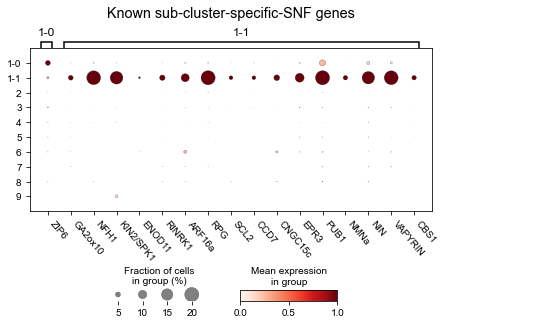

In [ ]:
axs = sc.pl.dotplot(
    ad,
    dt_epiMarkerGene,
    "leiden_subEpi",
    layer="normalize_log",
    standard_scale="var",
    dot_max=0.2,
    show=False, figsize=(9,3)
)
ax = axs["mainplot_ax"]
plt.sca(ax)
ls_xGeneName = (
    ax.get_xticklabels() | F(map, lambda x: dt_locus2name[x.get_text()]) | F(list)
)
plt.xticks(range(len(ls_xGeneName))|F(map, lambda x:x+0.5)|F(list), ls_xGeneName, rotation=-50, ha='left')
plt.title("Known sub-cluster-specific-SNF genes", y=1.15)
axs['size_legend_ax'].set_position([0.25, -0.29, 0.15, 0.1])
axs['color_legend_ax'].set_position([0.45, -0.29, 0.15, 0.05])
plt.show()

In [ ]:
_ls = ad.uns['leiden_subEpi_cellexES'].query("enrichScore > 0.8 & leiden_subEpi == '1-1'")['gene'].to_list()
df_go = enrichmentAnalysisGO(_ls, ad.var.index.to_list())
df_go = df_go.query("`-log10Pvalue` > 4")

In [ ]:
df_go['Category'] = df_go['Category'].map( {x:y for x,y in zip(['biological_process', 'cellular_component', 'molecular_function'],['Biological Process', 'Cellular Component', 'Molecular Function'])})

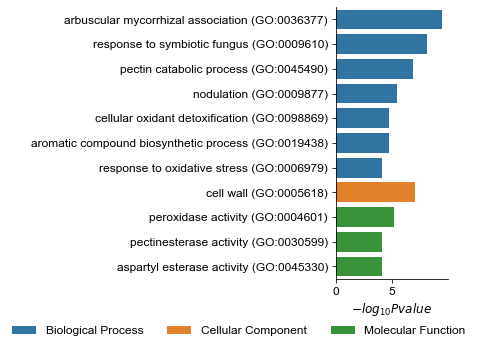

In [ ]:
fig, ax = plt.subplots(figsize=(2, 5))
sns.barplot(data=df_go, x="-log10Pvalue", y="Description", hue = 'Category', ax=ax, dodge=False)
plt.legend(loc='lower left', bbox_to_anchor=[-3,-0.25], ncol=3, frameon=False)
plt.ylabel('')
plt.xlabel("$-log_{10}Pvalue$")
sns.despine(top=True, right=True)
plt.show()

In [ ]:
ad_epi = sc.read_h5ad(f"{dir_temp}/ad_epi_reclustering.h5ad")

In [ ]:
ad.X = ad.layers['normalize_log'].copy()
ad_epi.raw = ad[ad_epi.obs.index]

ad_epiRaw = ad_epi.raw.to_adata()
ad_epiRaw.layers['normalize_log'] = ad_epiRaw.X.copy()
ad_epiRaw.layers['raw'] = ad[ad_epiRaw.obs.index].layers['raw'].copy()
ad_epiRaw.obsm['X_umap'] = ad_epi.obsm['X_umap'].copy()

In [ ]:
_fc = lambda x: "Non-inoculated" if x == "Mock" else "Inoculated"

In [ ]:
ad.obs["Sample_two"] = (
    ad.obs["Sample"]
    .map(_fc)
    .astype("category")
    .cat.reorder_categories(["Non-inoculated", "Inoculated"])
)

In [ ]:
ad_epiRaw.obs["Sample_two"] = (
    ad_epiRaw.obs["Sample"]
    .map(_fc)
    .astype("category")
    .cat.reorder_categories(["Non-inoculated", "Inoculated"])
)

In [ ]:
ad_epi.obs["Sample_two"] = (
    ad_epi.obs["Sample"]
    .map(_fc)
    .astype("category")
    .cat.reorder_categories(["Non-inoculated", "Inoculated"])
)

In [ ]:
ad_epiRawMerged = singleCellTools.geneEnrichInfo._mergeData(
    ad_epiRaw[ad_epiRaw.obs.eval("leiden_subEpi == '1-1'")], "Sample"
)
singleCellTools.basic.initLayer(ad_epiRawMerged, total=1e6)

In [ ]:
ad_epiRawTwoMerged = singleCellTools.geneEnrichInfo._mergeData(
    ad_epiRaw[ad_epiRaw.obs.eval("leiden_subEpi == '1-1'")], "Sample_two"
)
singleCellTools.basic.initLayer(ad_epiRawTwoMerged, total=1e6)

In [ ]:
sc.pp.filter_genes(ad_epiRaw, min_cells=1)

### compare with ara

In [ ]:
ad_ara = sc.read_h5ad('/data/Zhaijx/liuzj/projects/singleCell/01_data/benfey.h5ad')

In [ ]:
singleCellTools.basic.initLayer(ad_ara, 'RNA_counts')

In [ ]:
singleCellTools.geneEnrichInfo.calculateEnrichScoreByCellex(
    ad_ara, "raw", clusterName="time.celltype.anno.crude", dt_kwargsForCellex = dict(verbose=True)
)

In [ ]:
ad_ara.write_h5ad('/data/Zhaijx/liuzj/projects/singleCell/01_data/benfey.h5ad')

In [ ]:
ad_epiAraTransferd = loadPkl(
    "ad_med_epi", lambda **dt: sc.read_h5ad(**dt), arg_path="filename"
)

In [ ]:
ad_epi.obs['labelTransfer_scanvi_time.celltype.anno.crude'] = ad_epiAraTransferd.obs['labelTransfer_scanvi_time.celltype.anno.crude']
ad_epi.obs['annoByScanvi'] = ad_epiAraTransferd.obs['labelTransfer_scanvi_time.celltype.anno.crude'].str.split('_').str[-1]

In [ ]:
ad_epi

AnnData object with n_obs × n_vars = 4836 × 16853
    obs: 'Tissue', 'labelTransfer_scanvi_celltype.anno', 'batch_time', 'leiden', 'n_counts', '__group', 'leiden_R', 'orig.ident', 'specie', 'labelTransfer_scanvi_time.celltype.anno', 'labelTransfer_scanvi_time.anno', 'Sample', 'Cell type', 'mofa1_sub', 'leiden.0.75', 'leiden.0.4', 'leiden_merged', 'ct_merged', 'leiden_subEpi', 'Sample_two', 'auc_cellwallDegradedGenesAll', 'auc_cellwallDegradedGenesEnrich', 'labelTransfer_scanvi_time.celltype.anno.crude', 'annoByScanvi'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches', 'n_cells'
    uns: 'Cell type_colors', 'Sample_colors', 'Tissue_colors', 'batchTimeDiff_pairwise_leiden_0', 'batchTimeDiff_pairwise_leiden_1', 'batchTimeDiff_pairwise_leiden_2', 'batchTimeDiff_pairwise_leiden_3', 'batchTimeDiff_pairwise_leiden_4', 'batchTimeDiff_pairwise_leiden_5', 'batchTimeDiff_pairwise_leiden_6', 'batchTimeDiff_pairwise_leiden_7', 'ba

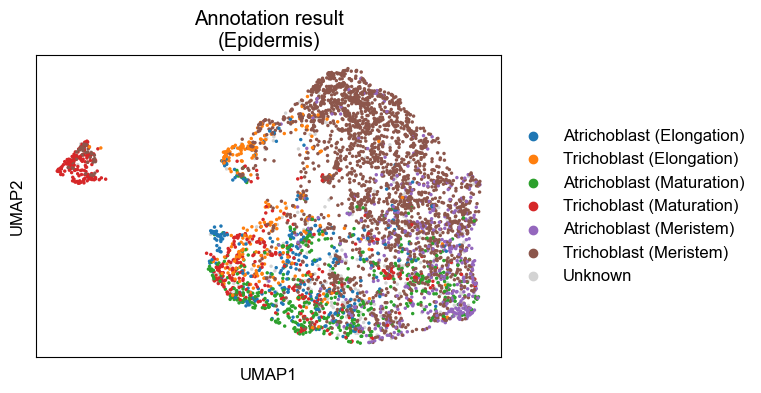

In [ ]:
with plt.rc_context({"figure.dpi": 100}):
    ax = sc.pl.umap(
        ad_epi,
        color="labelTransfer_scanvi_time.celltype.anno.crude",
        title="Annotation result\n(Epidermis)", show=False
    )
    handles, labels = ax.get_legend_handles_labels()
    labels = ['Atrichoblast (Elongation)', 'Trichoblast (Elongation)', 'Atrichoblast (Maturation)', 'Trichoblast (Maturation)', 'Atrichoblast (Meristem)', 'Trichoblast (Meristem)', "Unknown"]
    plt.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

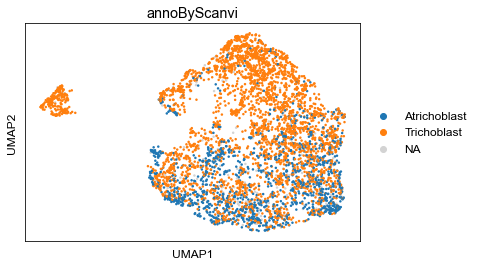

In [ ]:
sc.pl.umap(ad_epi, color='annoByScanvi')

In [ ]:
ad_rh = ad_epi[ad_epi.obs.eval("leiden_subEpi == '1-1'")]

#### GO

In [ ]:
from jpy_tools.otherTools import getGoDesc

In [ ]:
df_araGo = pd.read_table('/data/Zhaijx/liuzj/data/Araport11/tair10/ath_go_parsed.txt')
df_goDesc = getGoDesc(df_araGo["goTerm"].unique().tolist(), retry=10)
dt_goCategory =  df_goDesc['aspect'].to_dict()
df_araGo = df_araGo.assign(cate = lambda df:df['goTerm'].map(dt_goCategory))

df_termGene = df_araGo[["goTerm", "gene"]].rename(
    columns={"gene": "Gene stable ID", "goTerm": "GO term accession"}
)
df_termName = df_goDesc.reset_index()[["index", "hitName"]].rename(
    columns={"index": "GO term accession", "hitName": "GO term name"}
)
dt_goToCat = df_araGo.set_index("goTerm")["cate"].to_dict()

cpro = importr('clusterProfiler')
rBase = importr("base")
R = ro.r

dfR_termGene = py2r(df_termGene)
dfR_termName = py2r(df_termName)

def enrichmentAnalysisGO(ls_gene, ls_background, qvalueCutoff=0.2, dt_goToCat=dt_goToCat):
    _go = cpro.enricher(
        R.c(*ls_gene),
        universe=R.c(*ls_background),
        TERM2GENE=dfR_termGene,
        TERM2NAME=dfR_termName,
        qvalueCutoff=qvalueCutoff,
    )
    df_go = r2py(rBase.as_data_frame(_go))
    df_go["-log10Pvalue"] = np.log10(df_go["pvalue"]) * -1
    if dt_goToCat:
        df_go["Category"] = df_go.index.map(dt_goToCat)
        df_go = df_go.sort_values(["Category", "pvalue"])
    else:
        df_go = df_go.sort_values(["pvalue"])
    return df_go

In [ ]:
sc.pp.filter_genes(ad_ara, min_cells=3)

In [ ]:
sc.pl.embedding(
    ad_ara, 'umap_integrated',
    color=['AT1G11920', 'AT2G41850'],
    ncols=4,
    cmap="Reds",layer='normalize_log'
)

In [ ]:
len(_ls)

In [ ]:
_ls = ['GO:0030599', 'GO:0045490']
_ls = df_araGo.query('goTerm in @_ls & gene in @ad_ara.var.index')['gene'].unique()

In [ ]:
ls_araRootHairGenes = (
    ad_ara.uns["time.celltype.anno.crude_cellexES"]
    .query(
        "enrichScore > 0.8 & `time.celltype.anno.crude` == 'Maturation_Trichoblast'"
    )["gene"]
    .to_list()
)

In [ ]:
df_go = enrichmentAnalysisGO(ls_araRootHairGenes, ad_ara.var.index.to_list())

In [ ]:

fig, ax = plt.subplots(figsize=(4, df_go.shape[0] * 0.2))
df_go['Description'] = df_go['Description'].str.split(r' \(').str[0]
sns.barplot(data=df_go, x="-log10Pvalue", y="Description", hue = 'Category', ax=ax, dodge=False)
ax.get_legend().remove()
#     plt.legend(loc='lower left', bbox_to_anchor=[-1.2,-0.4], ncol=3, frameon=False)
plt.ylabel('')
sns.despine(top=True, right=True)
plt.title("Mature root hair (Arabidopsis)")
plt.show()